- (c) Ken-ichi Fukui, 2021/02/08
- MIT License

## 決定木学習によるIrisデータの識別と決定木の描画

In [1]:
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt

In [2]:
# テストデータの割合
test_proportion = 0.3
# Iris データセットをロード  
iris = datasets.load_iris()
# 特徴ベクトルを取得
X = iris.data
# クラスラベルを取得
y = iris.target

In [3]:
# z標準化
X_std = scale(X)

# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = test_proportion, random_state = 1)

In [4]:
# エントロピーを指標とする決定木のインスタンスを生成し，決定木のモデルに学習データを適合させる
dtc= DecisionTreeClassifier(criterion='entropy', max_depth=4)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### 学習した決定木を用いて学習データおよびテストデータのクラスを予測し，結果をy_train_predicted, y_test_predictedに格納する

In [5]:
y_train_predicted = dtc.predict(X_train)
y_test_predicted = dtc.predict(X_test)

In [6]:
# テストデータの正解クラスと決定木による予測クラスを出力
print("Test Data")
print("True Label     ", y_test)
print("Predicted Label", y_test_predicted)

Test Data
True Label      [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]
Predicted Label [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]


### 関数precision_recall_fscore_supportを使用して，学習データおよびテストデータに対するprecision，recall，F値の算出しfscore_train, fscore_testに格納する

In [7]:
fscore_train = precision_recall_fscore_support(y_train, y_train_predicted)
fscore_test = precision_recall_fscore_support(y_test, y_test_predicted)

### 平均precision, recall, F値

In [8]:
print('Training data')
print('Class 0 Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (fscore_train[0][0], fscore_train[1][0], fscore_train[2][0]))
print('Class 1 Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (fscore_train[0][1], fscore_train[1][1], fscore_train[2][1]))
print('Class 2 Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (fscore_train[0][2], fscore_train[1][2], fscore_train[2][2]))
print('Average Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (np.average(fscore_train[0]), np.average(fscore_train[1]), np.average(fscore_train[2])))

print('Test data')
print('Class 0 Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (fscore_test[0][0], fscore_test[1][0], fscore_test[2][0]))
print('Class 1 Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (fscore_test[0][1], fscore_test[1][1], fscore_test[2][1]))
print('Class 2 Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (fscore_test[0][2], fscore_test[1][2], fscore_test[2][2]))
print('Average Precision: %.3f, Recall: %.3f, Fscore: %.3f' % 
      (np.average(fscore_test[0]), np.average(fscore_test[1]), np.average(fscore_test[2])))

Training data
Class 0 Precision: 1.000, Recall: 1.000, Fscore: 1.000
Class 1 Precision: 1.000, Recall: 1.000, Fscore: 1.000
Class 2 Precision: 1.000, Recall: 1.000, Fscore: 1.000
Average Precision: 1.000, Recall: 1.000, Fscore: 1.000
Test data
Class 0 Precision: 1.000, Recall: 1.000, Fscore: 1.000
Class 1 Precision: 0.944, Recall: 0.944, Fscore: 0.944
Class 2 Precision: 0.923, Recall: 0.923, Fscore: 0.923
Average Precision: 0.956, Recall: 0.956, Fscore: 0.956


### 学習した決定木の描画

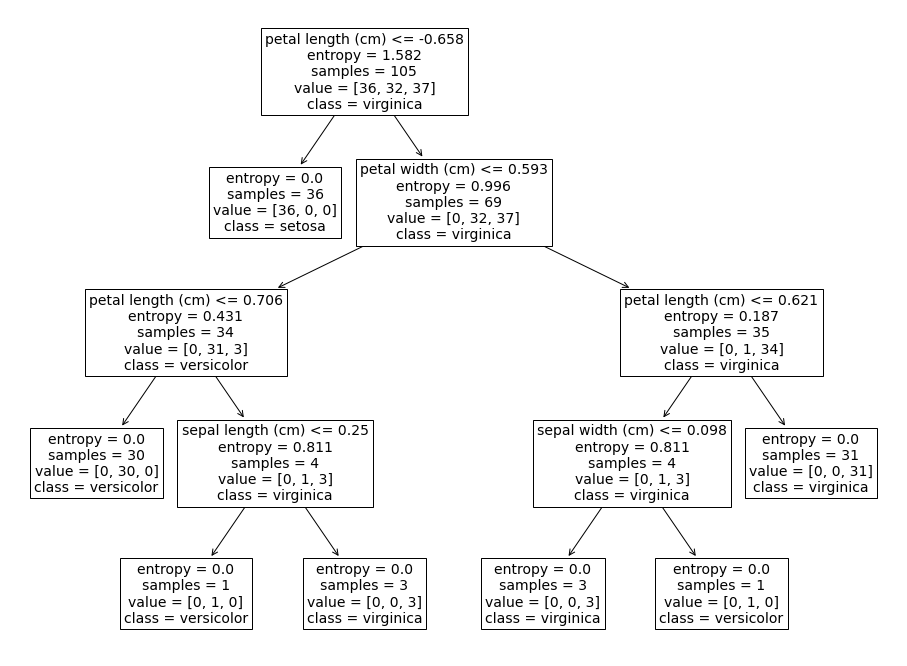

In [9]:
plt.figure(figsize=(16,12))
tree.plot_tree(decision_tree=dtc, feature_names=iris.feature_names, 
               class_names=iris.target_names, fontsize=14)
plt.show()

### 10 fold cross-validation を行い，最大深さを変化させたときの学習データおよびテストデータに対する平均Accuracyを算出し，グラフにプロット

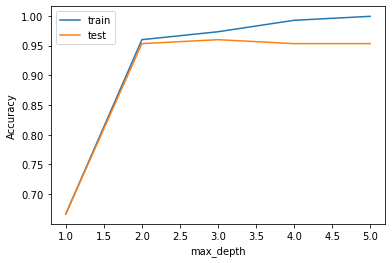

In [10]:
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

trn_acc_ave, tst_acc_ave, num_k = [],[],[]
for k in range(5):
    dtc = DecisionTreeClassifier(criterion='entropy', max_depth=k+1)
    ret = cross_validate(dtc, X_std, y, cv=10, return_train_score=True)
    trn_acc_ave.append(np.mean(ret['train_score']))
    tst_acc_ave.append(np.mean(ret['test_score']))
    num_k.append(k+1)

plt.plot(num_k, trn_acc_ave, label="train")
plt.plot(num_k, tst_acc_ave, label="test")
plt.legend()

plt.xlabel("max_depth")
plt.ylabel("Accuracy")

plt.show()